In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,0.726080,1.996151,-1.664494,0.327745,0.153248,1
1,0.401862,-3.138901,1.648350,-0.219095,-0.258273,0
2,0.583850,1.154954,-0.913950,1.436496,0.893177,1
3,-1.316766,0.588303,2.426382,1.765783,-0.079954,0
4,3.768016,0.135846,0.773413,3.091290,0.685593,1


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [5]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [6]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [7]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_6888\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [8]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_6888\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [9]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\HP\AppData\Local\Temp\ipykernel_6888\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [10]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col4', 'col5', 'target'], dtype='object')
Index(['col1', 'col3', 'target'], dtype='object')
Index(['col4', 'col3', 'target'], dtype='object')


In [11]:
df3

,col4,col3,target
91,2.061393,2.397251,0
45,-2.418545,-2.772075,1
71,1.511255,-0.131754,1
76,-0.058432,-1.314866,1
47,0.975034,1.390949,0
35,2.005779,1.166200,0
81,0.860343,-0.152613,1
41,-0.375731,-2.982946,1
34,-0.649024,-2.281317,1
63,0.848551,2.711083,0


In [12]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [13]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [14]:
from sklearn.tree import plot_tree

[Text(0.6666666666666666, 0.9166666666666666, 'X[1] <= 0.464\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.5555555555555556, 0.75, 'X[0] <= 2.893\ngini = 0.245\nsamples = 35\nvalue = [30, 5]'),
 Text(0.4444444444444444, 0.5833333333333334, 'X[0] <= -0.366\ngini = 0.117\nsamples = 32\nvalue = [30, 2]'),
 Text(0.2222222222222222, 0.4166666666666667, 'X[1] <= -1.025\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.4166666666666667, 'X[1] <= 0.268\ngini = 0.064\nsamples = 30\nvalue = [29, 1]'),
 Text(0.5555555555555556, 0.25, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]'),
 Text(0.7777777777777778, 0.25, 'X[0] <= 1.894\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.6666666666666666, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8888888888888888, 0.08333333333333333, 'gini = 0.

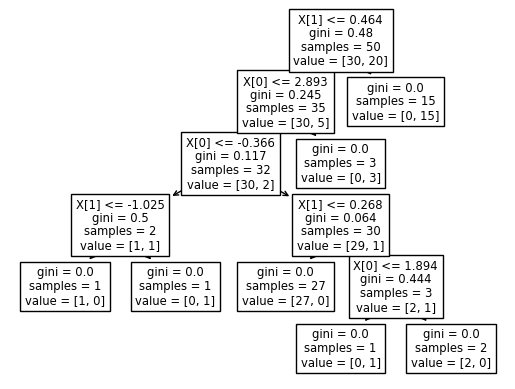

In [15]:
plot_tree(clf1)

[Text(0.6666666666666666, 0.9, 'X[1] <= 0.967\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.5555555555555556, 0.7, 'X[0] <= -0.299\ngini = 0.327\nsamples = 34\nvalue = [7, 27]'),
 Text(0.3333333333333333, 0.5, 'X[1] <= -0.813\ngini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.2222222222222222, 0.3, 'X[1] <= -1.446\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.7777777777777778, 0.5, 'X[0] <= -0.004\ngini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.6666666666666666, 0.3, 'X[0] <= -0.132\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7777777777777778, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 23\nval

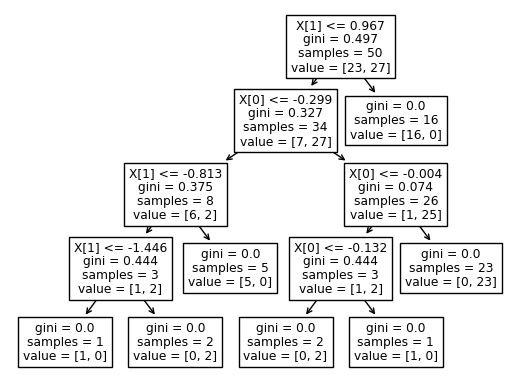

In [16]:
plot_tree(clf2)

[Text(0.5909090909090909, 0.9, 'X[1] <= 0.57\ngini = 0.487\nsamples = 50\nvalue = [21, 29]'),
 Text(0.36363636363636365, 0.7, 'X[0] <= 1.35\ngini = 0.291\nsamples = 34\nvalue = [6, 28]'),
 Text(0.18181818181818182, 0.5, 'X[1] <= -0.119\ngini = 0.08\nsamples = 24\nvalue = [1, 23]'),
 Text(0.09090909090909091, 0.3, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]'),
 Text(0.2727272727272727, 0.3, 'X[0] <= 0.64\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.18181818181818182, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5454545454545454, 0.5, 'X[1] <= -0.217\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.45454545454545453, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.6363636363636364, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.8181818181818182, 0.7, 'X[0] <= 2.494\ngini = 0.117\nsamples = 16\nvalue = [15, 1]'),
 Text(0.7272727272727273, 0.5, 'gini = 0.0\nsamples = 15\nval

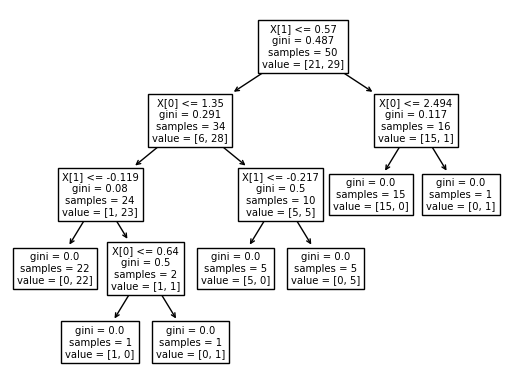

In [17]:
plot_tree(clf3)

In [18]:
clf1.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [19]:
clf2.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [20]:
clf3.predict(np.array([-1.042498,-0.064323]).reshape(1,2))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [21]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
66,1.664909,0.771045,-0.114045,1.747302,0.670630,1
46,2.427019,-1.726748,3.962928,-0.372683,-0.374502,0
79,1.917864,1.120250,2.702374,2.832837,-0.978950,1
19,-0.315455,-2.310986,0.628515,0.222624,-1.489024,0
96,1.002427,-0.412425,-1.164769,1.043667,3.108977,1
80,0.571490,1.510906,-0.828786,1.148321,-0.146568,1
98,2.800571,0.342836,-0.000146,2.578328,-0.432230,1
30,-1.076906,0.820033,3.792774,0.574228,-1.791224,0
28,-2.491630,0.636556,-0.028939,0.572177,-1.981874,0
14,-0.928326,-2.725990,0.586482,1.458768,-1.000191,0
